<a href="https://colab.research.google.com/github/Aergia-incognito/C.S-Project/blob/main/Dexter_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**가설**



1. 피해자와 가해자 사이의 관계(Relationship)와 사건 해결에는 큰 연관성이 있을 것이다. 
2. 살해무기(Weapon)와 사건의 해결 간에는 큰 연관성이 있을 것이다. 
3. 피해자의 인종(Victim Race, Victim Ethnicity)과 사건의 해결에는 큰 연관성이 있을 것이다.

# **인코더, 라이브러리 모두 불러오기**

In [54]:
!pip install category_encoders
!pip install plotly
!pip install pyyaml==5.4.1
!pip install pdpbox
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 148 kB/s 
     |████████████████████████████████| 13.1 MB 22.8 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=2623aff30d08f31d2a79d145d0e9fb30bad4de09b3845c1efea9b4d7f7854987
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 6.6 MB/s 
     |████████████████████████████████| 133 kB 52.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=5eae1b2c88ac3952d2583dce529d4e70504162aae03e17abe7b57f0c0336ec53
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

In [55]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, plot_confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, log_loss
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive

#**데이터 불러오기**

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
murder = pd.read_csv("/content/drive/MyDrive/database.csv")

murder

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638451,638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI
638452,638453,WY01800,Sublette County,Sheriff,Sublette,Wyoming,2014,December,1,Murder or Manslaughter,...,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,0,1,FBI


In [5]:
murder.columns = [col.strip().replace(' ','_')for col in murder.columns]
murder.columns

Index(['Record_ID', 'Agency_Code', 'Agency_Name', 'Agency_Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime_Type', 'Crime_Solved',
       'Victim_Sex', 'Victim_Age', 'Victim_Race', 'Victim_Ethnicity',
       'Perpetrator_Sex', 'Perpetrator_Age', 'Perpetrator_Race',
       'Perpetrator_Ethnicity', 'Relationship', 'Weapon', 'Victim_Count',
       'Perpetrator_Count', 'Record_Source'],
      dtype='object')

In [6]:
#이상치 제거 

murder = murder[(murder['Victim_Age']<99)&(murder['Victim_Age'] > 0)]
murder

,Record_ID,Agency_Code,Agency_Name,Agency_Type,City,State,Year,Month,Incident,Crime_Type,...,Victim_Ethnicity,Perpetrator_Sex,Perpetrator_Age,Perpetrator_Race,Perpetrator_Ethnicity,Relationship,Weapon,Victim_Count,Perpetrator_Count,Record_Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638447,638448,WY01301,Casper,Municipal Police,Natrona,Wyoming,2014,June,1,Murder or Manslaughter,...,Not Hispanic,Male,22,White,Unknown,Girlfriend,Handgun,0,0,FBI
638448,638449,WY01301,Casper,Municipal Police,Natrona,Wyoming,2014,August,1,Murder or Manslaughter,...,Unknown,Male,67,Black,Unknown,Friend,Firearm,0,0,FBI
638449,638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638450,638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI


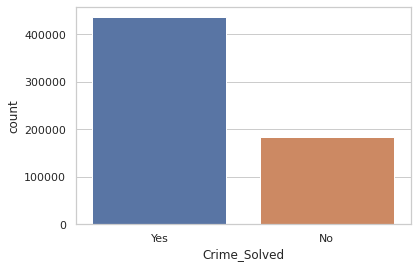

In [7]:
#타겟의 분포 살피기
target = murder['Crime_Solved']
sns.countplot(target);

In [8]:
#yes:1, no:0로 타겟값을 오디널 인코딩 해준다. 
enc = OrdinalEncoder()
murder[['Crime_Solved']] = enc.fit_transform(murder[['Crime_Solved']]).astype(int) 
murder[['Crime_Solved']]

,Crime_Solved
0,1
1,1
2,0
3,1
4,0
...,...
638447,1
638448,1
638449,0
638450,1


# **특성공학**

In [9]:
#ID나 코드, 에이전시 이름 등 관련이 없는 특성들과 애매한 정보를 담은 컬럼들, 그리고 카디널리티가 높은 칼럼들을 드랍한다.
df = murder.copy()
df = murder.drop(['Record_ID','Agency_Code','Agency_Name','Record_Source','Incident','Victim_Count'] , axis = 1)  

#가해자와 관련된 정보는 학습시 알 수 없으므로 데이터 누수 방지를 위해 미리 제거한다. 
drop_data = [col for col in murder.columns if 'Perp' in col]
df.drop(columns = drop_data, inplace = True)

In [10]:
#제거된 특성 확인하기
df.columns

Index(['Agency_Type', 'City', 'State', 'Year', 'Month', 'Crime_Type',
       'Crime_Solved', 'Victim_Sex', 'Victim_Age', 'Victim_Race',
       'Victim_Ethnicity', 'Relationship', 'Weapon'],
      dtype='object')

#**Train/Test 데이터 나누기**

In [18]:
#target 지정
target = 'Crime_Solved'

#train/test 분리(8:2)
train, test = train_test_split(df, train_size = 0.8,
                               stratify = murder[target], random_state = 2)

#train 데이터를 train/val로 분리(8:2)
train, val = train_test_split(train, train_size = 0.8,
                              stratify = train[target], random_state = 2)

train.shape, val.shape, test.shape


((396643, 13), (99161, 13), (123951, 13))

In [19]:
#x, y 분리해주기

X_train = train.drop(columns = [target])
y_train = train[target]

X_val = val.drop(columns = [target])
y_val = val[target]

X_test = test.drop(columns = [target])
y_test = test[target]

#**Baseline Model 만들기**

In [20]:
#타겟 범주의 비율 확인하기
df[target].value_counts(normalize = True)

1    0.703396
0    0.296604
Name: Crime_Solved, dtype: float64

In [21]:
#이진분류에서 기준모델은 타겟의 최빈값이 된다. 
print('기준모델의 정확도는: ', df[target].value_counts(normalize = True)[1])

기준모델의 정확도는:  0.7033956966865939


In [22]:
#기준모델 y_pred 만들기-> 최빈값인 1로 타겟의 길이만큼 가득찬 리스트 
y_pred = [1] * len(y_train)
print("training accuracy: ", round(accuracy_score(y_train, y_pred),4))

training accuracy:  0.7034


In [23]:
#최빈값으로만 찍은 베이스라인 모델이라 0에 대해서는 예측을 전혀 못한다. 
y_val_pred = [1]*len(y_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     29412
           1       0.70      1.00      0.83     69749

    accuracy                           0.70     99161
   macro avg       0.35      0.50      0.41     99161
weighted avg       0.49      0.70      0.58     99161



#**모델링**

**파이프라인 만들기**

In [28]:
pipe = make_pipeline(OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=np.nan),
                     SimpleImputer(),
                     DecisionTreeClassifier())
pipe.fit(X_train, y_train)
print("훈련세트의 정확도: ", pipe.score(X_train, y_train))
print("검증세트의 정확도: ", pipe.score(X_val,y_val))

훈련세트의 정확도:  0.9930239535300005
검증세트의 정확도:  0.8217343512066235


In [29]:
predictions = pipe.predict(X_val)

In [30]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70     29412
           1       0.87      0.87      0.87     69749

    accuracy                           0.82     99161
   macro avg       0.79      0.79      0.79     99161
weighted avg       0.82      0.82      0.82     99161



In [25]:
#과적합 해결하기
pipe = make_pipeline(OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=np.nan),
                     SimpleImputer(),
                     DecisionTreeClassifier(max_depth=6, random_state= 2))
pipe.fit(X_train, y_train)
print("훈련세트의 정확도: ", pipe.score(X_train, y_train))
print("검증세트의 정확도: ", pipe.score(X_val,y_val))


훈련세트의 정확도:  0.8436024334224983
검증세트의 정확도:  0.8444852310888353


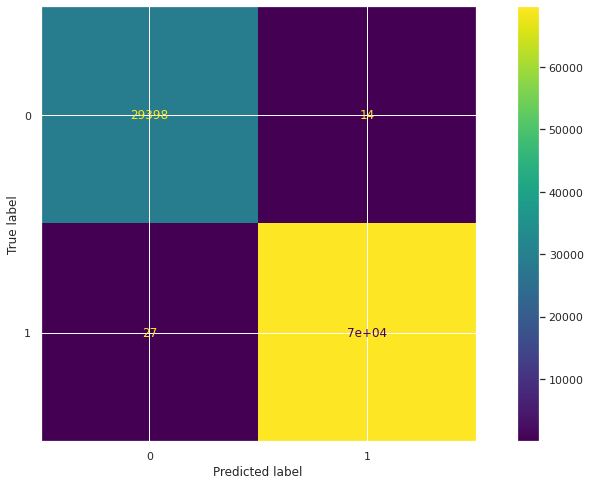

In [ ]:
#confusion matrix 그려보기

predictions = pipe.predict(X_val)
cm = confusion_matrix(y_val, predictions)
cmd = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = None)
cmd.plot()

In [ ]:
print(classification_report(y_val, predictions))

In [ ]:
#랜덤포레스트 모델 사용해보기

pipe1 = make_pipeline(OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=np.nan),
                     SimpleImputer(),
                     RandomForestClassifier(class_weight = "balanced", min_samples_leaf = 5, max_depth = 20, random_state = 2, n_jobs = -1, oob_score=True ))

pipe1.fit(X_train2, y_train2)
pred1 = pipe1.predict(X_val)
print("훈련세트의 정확도: ", pipe1.score(X_train2, y_train2))
print("검증세트의 정확도: ", pipe1.score(X_val,y_val))
print(classification_report(y_val, pred1))

In [31]:
df.corr().iloc[:,0].sort_values(ascending = False)

Year            1.000000
Victim_Age     -0.009608
Crime_Solved   -0.031480
Name: Year, dtype: float64

**Randomized CV 적용해서 하이퍼파라미터의 최적값 찾기**

In [ ]:
X_train.describe(exclude = 'number')

In [42]:
pipe_CV = Pipeline([
                        ('encode', make_pipeline(TargetEncoder(),SimpleImputer(),OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=np.nan))),
                        ('RF', RandomForestClassifier(class_weight = "balanced", random_state = 2, n_jobs = -1 ))
])

dists = {
    'RF__bootstrap': [True, False],
    'RF__max_depth': [10, 20, 30,None],
    'RF__max_features': ['auto', 'sqrt'],
    'RF__min_samples_leaf': [1, 2, 4],
    'RF__min_samples_split': [2, 5, 10],
    'RF__n_estimators': [20,50,100],
    "RF__criterion": ['gini', 'entropy']
}

clf = RandomizedSearchCV(
    pipe_CV, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [44]:
print('best parameters: ', clf.best_params_)
print('score: ', clf.best_score_)

best parameters:  {'RF__n_estimators': 100, 'RF__min_samples_split': 5, 'RF__min_samples_leaf': 1, 'RF__max_features': 'auto', 'RF__max_depth': None, 'RF__criterion': 'gini', 'RF__bootstrap': True}
score:  0.897661652300291


In [66]:
pipe_CV_rf = clf.best_estimator_

In [47]:
print("훈련세트의 정확도: ", pipe_CV_rf.score(X_train, y_train))
print("검증세트의 정확도: ", pipe_CV_rf.score(X_val,y_val))

훈련세트의 정확도:  0.956923480308489
검증세트의 정확도:  0.8630005748227629


In [48]:
predictions_rf = pipe_CV_rf.predict(X_val)

In [49]:
print(classification_report(y_val, predictions_rf))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79     29412
           1       0.93      0.87      0.90     69749

    accuracy                           0.86     99161
   macro avg       0.83      0.86      0.84     99161
weighted avg       0.87      0.86      0.87     99161



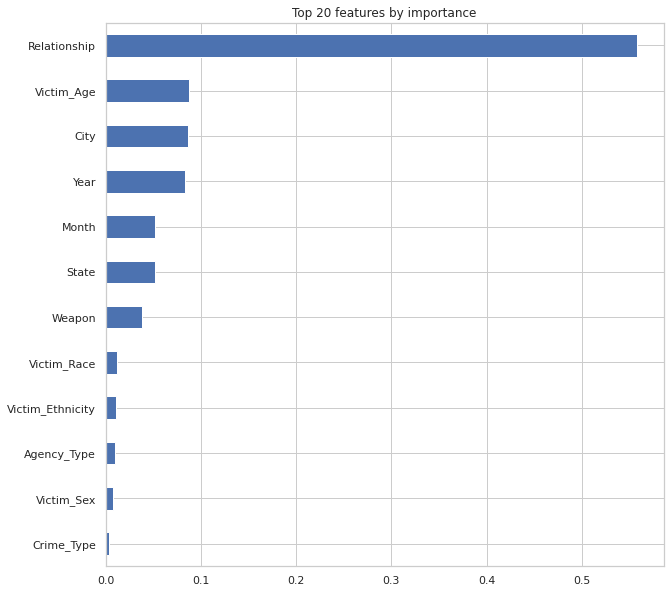

In [57]:
# 특성 중요도
CV_rf =pipe_CV_rf.named_steps['RF']
importances = pd.Series(CV_rf.feature_importances_, X_train.columns)

n = 20
plt.figure(figsize=(10,10))
plt.title(f'Top {n} features by importance')
importances.sort_values()[-n:].plot.barh();

In [63]:
permuter = PermutationImportance(
    pipe_CV_rf.named_steps['RF'], # model
    scoring = 'f1', # metric
    n_iter = 5, # 다른 random seed를 사용하여 5번 반복
    random_state = 2
)

# permuter 계산은 preprocessing 된 X_val를 사용한다.
X_val_rf = pipe_CV_rf.named_steps['encode'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업이다
permuter.fit(X_val_rf, y_val);

In [64]:
feature_names = X_val.columns.tolist()

# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top = None, 
    feature_names = feature_names 
)

Weight,Feature
0.2017 ± 0.0018,Relationship
0.0216 ± 0.0013,Year
0.0203 ± 0.0009,State
0.0133 ± 0.0008,City
0.0062 ± 0.0006,Weapon
0.0050 ± 0.0004,Victim_Ethnicity
0.0045 ± 0.0005,Victim_Age
0.0020 ± 0.0005,Month
0.0017 ± 0.0002,Agency_Type
0.0014 ± 0.0002,Crime_Type


In [65]:
#crime type, victim_sex 제거하고 학습해서 최종 성능 반환

target = 'Crime_Solved'
train, test = train_test_split(df, train_size = 0.90, test_size = 0.10,
                               stratify = df[target], random_state = 2)


y_train = train[target]
X_train = train.copy().drop(columns = [target, 'Crime_Type', 'Victim_Sex'])

y_test = test[target]
X_test = test.copy().drop(columns = [target, 'Crime_Type', 'Victim_Sex'])

In [69]:
pipe_rf_CV = Pipeline([
                        ('encode', make_pipeline(TargetEncoder(),SimpleImputer(),OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value=np.nan))),
                        ('RF', RandomForestClassifier(class_weight = "balanced", 
                                                      random_state = 2, 
                                                      n_jobs = -1,
                                                      n_estimators = 100,
                                                      min_samples_split = 5,
                                                      max_features = 'auto',
                                                      max_depth = None,
                                                      criterion = 'gini',
                                                      bootstrap = True))
])


In [77]:
#일반화 성능 확인
k = 10
scores = cross_val_score(pipe_rf_CV, X_train, y_train, cv = k, scoring = 'f1')

print(f'f1_score for {k} folds:', scores)

f1_score for 10 folds: [0.90173563 0.90142704 0.89908836 0.9013921  0.89887759 0.89826826
 0.89957231 0.89970953 0.89777766 0.90026399]


In [78]:
scores.mean()

0.8998112471103739

In [79]:
pipe_rf_CV.fit(X_train, y_train)
print('훈련 정확도: ', pipe_rf_CV.score(X_train, y_train))

훈련 정확도:  0.9561134427793087


In [81]:
print('테스트 정확도: ', pipe_rf_CV.score(X_test, y_test))

테스트 정확도:  0.8641248225119401
